<a href="https://colab.research.google.com/github/dayeonkimm/OZ/blob/main/%08machine_learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 생존자 예측 모델
- 탑승객 정보를 기반으로 => 해당 탑승객의 생존 여부를 예측

In [9]:
# 데이터 로드
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head(3)

df_test = pd.read_csv('test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
# EDA (Exploratory Data Analysis)

print(df_train.columns) # train
print(df_test.columns) # test

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [12]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [13]:
# null 데이터 개수 체크
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
# 어떤 컬럼을 살리고, 어떤 컬럼을 지울것인가? => 시각화를 통해서 진행
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart(column_name):

    survived = df_train[df_train['Survived'] ==1][column_name].value_counts()
    dead = df_train[df_train['Survived'] ==0][column_name].value_counts()

    df_merged = pd.DataFrame({'Survived':survived, 'Dead':dead})

    df_merged.plot(kind='bar', stacked=True, figsize=(12,8))

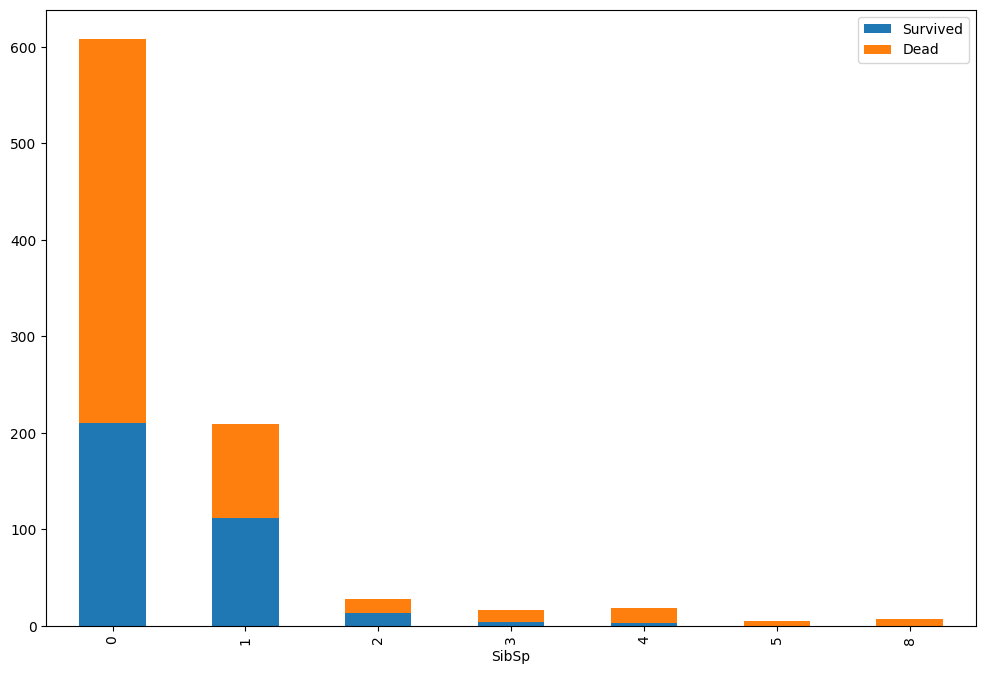

In [15]:
# 질문을 던진다 어떤 컬럼이 생존확률에 영향을 미칠까?
bar_chart('SibSp')

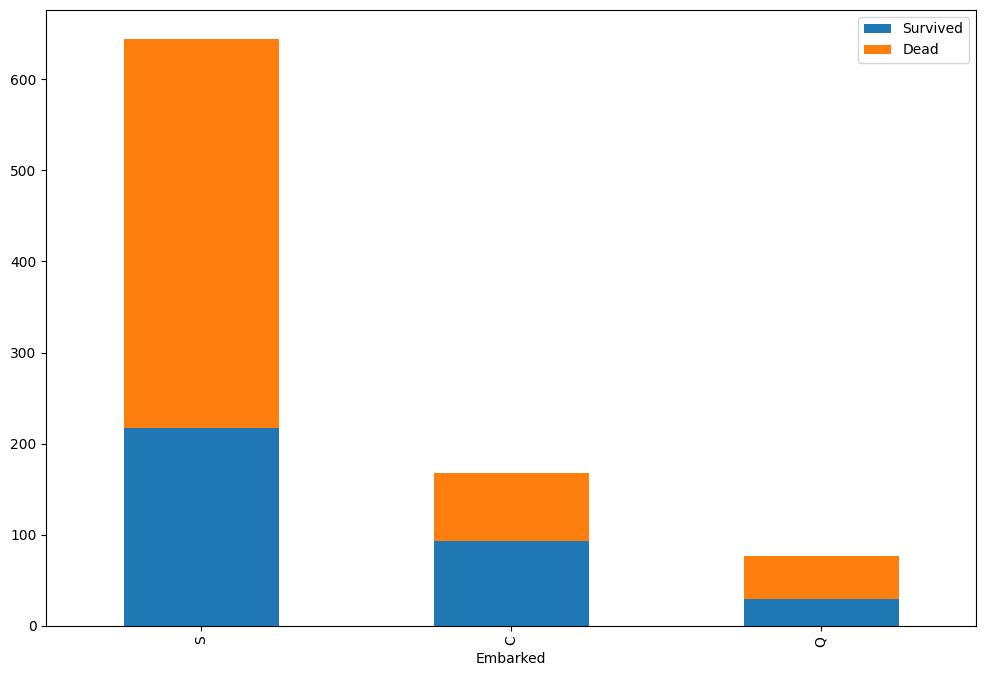

In [16]:
bar_chart('Embarked')

In [17]:
# 가장 많은 요금을 낸 상위 10명의 생존율은 어떻게 될까요?
df_train.sort_values(by='Fare', ascending=False).head(10)['Survived'].value_counts()
df_train.sort_values(by='Fare', ascending=False).tail(10)['Survived'].value_counts()

Survived
0    10
Name: count, dtype: int64

In [18]:
train_test_data = [df_train, df_test]

for data in train_test_data:
    data['Name'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [19]:
df_train['Name'].value_counts()

# 문자열 -> 숫자형 데이터로 변경
name_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 3
}

for data in train_test_data:
    data['Name'] = data['Name'].map(name_mapping)

In [20]:
df_train['Name'].value_counts()

Name
0.0    517
1.0    182
2.0    125
3.0     46
4.0      7
Name: count, dtype: int64

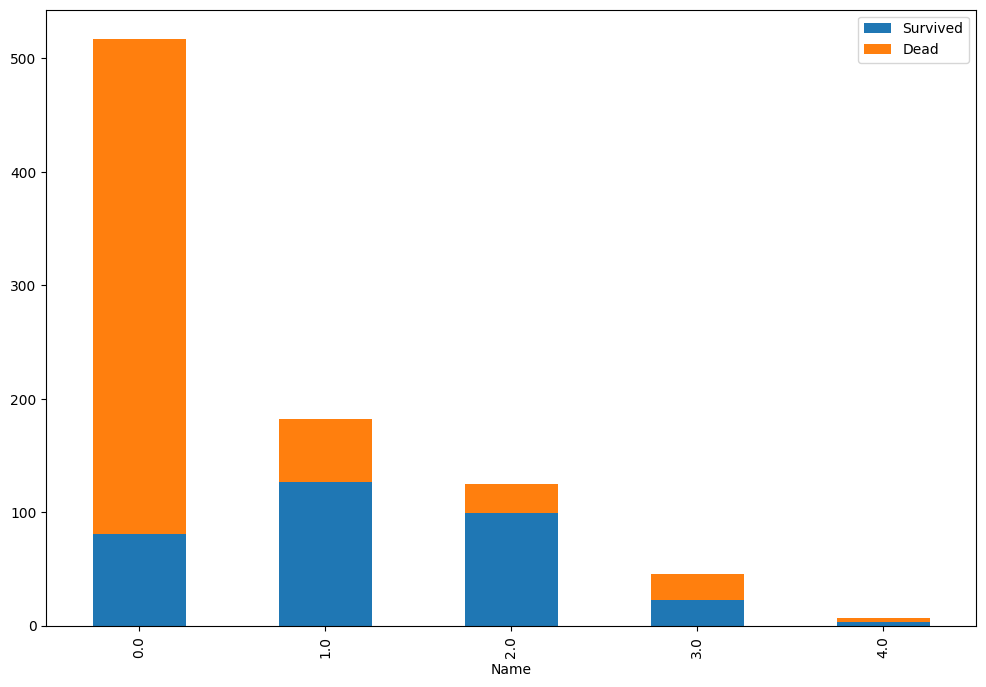

In [21]:
bar_chart('Name')

In [22]:
# Sex
df_train['Sex'] = df_train['Sex'].replace({"male":0, "female":1})
df_test['Sex'] = df_test['Sex'].replace({"male":0, "female":1})

In [23]:
df_train['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [24]:
# Age
df_train['Age'].isna().sum()

df_train['Age'].fillna(df_train.groupby('Name')['Age'].transform('mean'),inplace=True)
df_test['Age'].fillna(df_test.groupby('Name')['Age'].transform('mean'),inplace=True)

In [25]:
df_test['Age'].isna().sum()

1

In [26]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [27]:
age_bins = [0, 16, 32, 55, 100]
age_labels = [0, 1, 2, 3]

for data in train_test_data:
    data['Age']=pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [28]:
df_train['Age'].value_counts()

Age
1    382
2    365
0    104
3     40
Name: count, dtype: int64

In [29]:
# SibSp, Parc

for data in train_test_data:
    data['Family'] = data['SibSp'] + data['Parch'] + 1

In [30]:
df_train['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [31]:
# Fare
df_train['Fare'].isna().sum()

fare_bins = [0, 20, 100, 1000]
fare_labels = [0, 1, 2]

for data in train_test_data:
    data['Fare'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels)

In [32]:
df_train['Fare'].value_counts()

Fare
0    500
1    323
2     53
Name: count, dtype: int64

In [33]:
# Embarked

df_train['Embarked'] = df_train['Embarked'].replace({"S":0, "C":1, "Q":2})
df_test['Embarked'] = df_test['Embarked'].replace({"S":0, "C":1, "Q":2})

In [34]:
df_test['Age'].fillna(0, inplace=True)

In [35]:
df_train['Embarked'].value_counts()
df_train['Embarked'].fillna(0, inplace=True)
df_test['Embarked'].fillna(0, inplace=True)

In [36]:
drop_train_cols = ['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
df_train_final = df_train.drop(drop_train_cols, axis=1)

In [37]:
drop_test_cols = ['SibSp', 'Parch', 'Ticket', 'Cabin']
df_test_final = df_test.drop(drop_test_cols, axis=1)
df_test_final

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,892,3,0.0,0,2,0,2,1
1,893,3,2.0,1,2,0,0,2
2,894,2,0.0,0,3,0,2,1
3,895,3,0.0,0,1,0,0,1
4,896,3,2.0,1,1,0,0,3
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,0,0,1
414,1306,1,NaN,1,2,2,1,1
415,1307,3,0.0,0,2,0,0,1
416,1308,3,0.0,0,1,0,0,1


In [38]:
df_train_final.fillna(0, inplace=True)
df_test_final.fillna(0, inplace=True)

In [39]:
features = df_train_final.drop('Survived', axis=1)
labels = df_train_final['Survived']

In [40]:
# 모델링
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [42]:
# KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [43]:
# DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, features, labels, cv=kfold, scoring='accuracy')

import numpy as np
print(np.mean(scores)*100)

80.24094881398251


In [44]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores)*100)

79.23345817727841


In [45]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(rf, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores)*100)

81.13732833957552


In [46]:
# GaussianNB

gb = GaussianNB()
scores = cross_val_score(gb, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores)*100)

80.35705368289638


In [47]:
# SVC

svc = SVC()
scores = cross_val_score(svc, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores)*100)

83.04744069912608


In [48]:
# SVC 알고리즘을 사용해서 최종 결과값 도출
svc.fit(features, labels)

SVC()

In [51]:
# 수능시험 보러가야죠 수능문제는?
test_data = df_test_final.drop('PassengerId', axis=1)
test_data # 수능 문제

pred = svc.predict(test_data)

In [55]:
df_final_submit = pd.DataFrame({
    "PassengerId": df_test_final['PassengerId'],
    "Survived": pred
})

df_final_submit.set_index('PassengerId', inplace=True)

In [56]:
df_final_submit.to_csv('submission.csv', )